# COLD
Concurrent Loads Disaggregator

In [1]:
import numpy as np

In [2]:
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
from neural import ModelCOLD
from data import collate, DataModule

Global variables

In [4]:
random_seed = 0
n_inputs = 201
train_dataset_path_tpl = "./synthetic/train_%d"
validation_dataset_path_tpl = "./synthetic/validation_%d"
test_dataset_path_tpl = "./synthetic/test_%d"

## Experiment 1

In [6]:
experiment = 1
train_dataset_path = train_dataset_path_tpl % experiment
validation_dataset_path = validation_dataset_path_tpl % experiment
test_dataset_path = test_dataset_path_tpl % experiment
labels = ["cfl", "fridge",  "ac", "laptop", "vacuumcleaner",
          "lightbulb", "fan", "coffeemachine", "kettle", "flatiron",
          "solderingiron"]
# Max number of concurrent loads in the dataset
w_max = 3

In [7]:
# Hyperparameters from ASHA
config = {
    "lr": 0.00040935087469661684,
    "weight_decay": 0.1713436419711966,
    "batch_size": 32,
    "dropout": 0.1,
    "layout":  (256, 10, 8),
}
# Pytorch Lightning pipeline
pl.seed_everything(random_seed)
# Callbacks
checkpoint_callback = ModelCheckpoint(
    monitor="validation_weighted_mean_f1",
    dirpath="./checkpoints/",
    filename="cold%d-{epoch:d}-{validation_weighted_mean_f1:.4f}" % experiment,
    save_top_k=3,
    mode="max",
)
early_stop_callback = EarlyStopping(
    monitor="validation_loss",
    min_delta=0.00,
    patience=8,
    verbose=True,
    mode="min",
)
# Tensorboard dashboard
logger = TensorBoardLogger("./logs/cold%d" %
                           experiment, name="cold%d" % experiment)

Global seed set to 0


In [8]:
# Initialize the model
cold = ModelCOLD(config, n_inputs, len(labels), w_max=w_max)

In [9]:
pipeline = pl.Trainer(max_epochs=60, gpus=[0, 1], accelerator="dp",
                      num_sanity_val_steps=0, callbacks=[checkpoint_callback, early_stop_callback],
                      val_check_interval=0.9, logger=logger, gradient_clip_val=1.)

data_module = DataModule(labels, train_dataset_path, validation_dataset_path,
                         test_dataset_path, batch_size=config["batch_size"],
                         collate_fn=collate, n_jobs=-1, drop_last=False)
# Start training
pipeline.fit(cold, datamodule=data_module)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name       | Type               | Params
--------------------------------------------------
0 | affine     | Linear             | 51.7 K
1 | sequence   | Sequential         | 1.3 M 
2 | mhsa       | MultiheadAttention | 263 K 
3 | classifier | Linear             | 2.8 K 
--------------------------------------------------
1.6 M     Trainable params
0         Non-trainable params
1.6 M     Total params
6.555     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric validation_loss improved. New best score: 0.248


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.034 >= min_delta = 0.0. New best score: 0.214


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.026 >= min_delta = 0.0. New best score: 0.188


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.182


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.175


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.028 >= min_delta = 0.0. New best score: 0.147


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.146


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.144


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.142


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.135


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric validation_loss did not improve in the last 8 records. Best score: 0.135. Signaling Trainer to stop.


Validating: 0it [00:00, ?it/s]

Monitored metric validation_loss did not improve in the last 9 records. Best score: 0.135. Signaling Trainer to stop.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

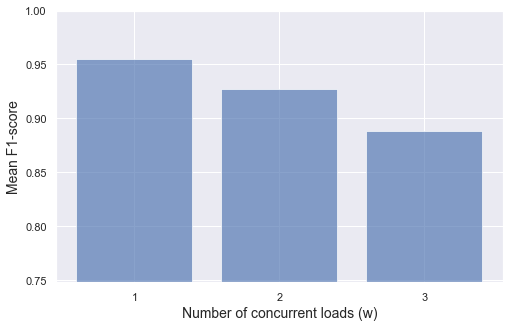

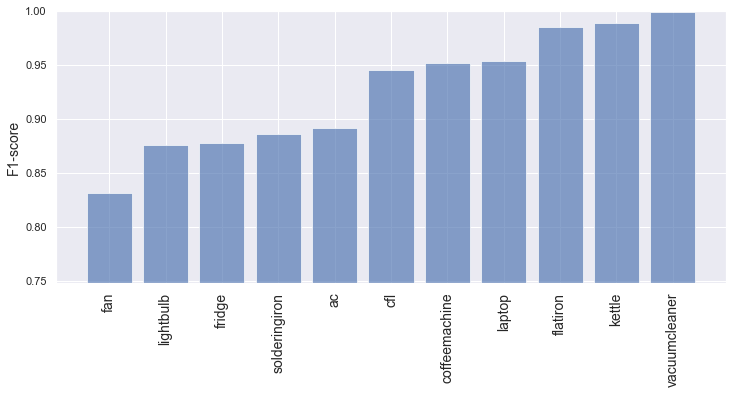

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'f1_ac': 0.8916488091150919,
 'f1_cfl': 0.9448974132537842,
 'f1_coffeemachine': 0.9514355460802714,
 'f1_fan': 0.8312967220942179,
 'f1_flatiron': 0.9854277769724528,
 'f1_fridge': 0.8776440223058065,
 'f1_kettle': 0.9887125492095947,
 'f1_laptop': 0.9541213512420654,
 'f1_lightbulb': 0.8760802149772644,
 'f1_solderingiron': 0.8862836559613546,
 'f1_vacuumcleaner': 0.99904731909434,
 'test_mean_f1_w=1': 0.955303,
 'test_mean_f1_w=2': 0.92761856,
 'test_mean_f1_w=3': 0.8886379,
 'test_t_opt': 0.6530612244897959,
 'test_weighted_mean_f1': 0.9238531589508057}
--------------------------------------------------------------------------------


In [11]:
# Load the model for evaluation
data_module = DataModule(labels, train_dataset_path, validation_dataset_path,
                         test_dataset_path, batch_size=256,
                         collate_fn=collate, n_jobs=-1, drop_last=False)
cold = ModelCOLD.load_from_checkpoint(
    "./checkpoints/cold1-epoch=28-validation_weighted_mean_f1=0.9332.ckpt")
test_log=pipeline.test(cold, datamodule=data_module)

## Experiment 2

In [47]:
experiment = 2
train_dataset_path = train_dataset_path_tpl % experiment
validation_dataset_path = validation_dataset_path_tpl % experiment
test_dataset_path = test_dataset_path_tpl % experiment
labels = ["kettle", "microwave", "washingmachine", "fridge", "vacuumcleaner"]
# Max number of concurrent loads in the dataset
w_max = 4

In [48]:
# Hyperparameters from ASHA
config = {
    "lr": 0.00076158821023566,
    "weight_decay": 0.035064995777058384,
    "batch_size": 32,
    "dropout": 0.1,
    "layout":  (256, 12, 8),
}
# Pytorch Lightning pipeline
pl.seed_everything(random_seed)
# Callbacks
checkpoint_callback = ModelCheckpoint(
    monitor="validation_weighted_mean_f1",
    dirpath="./checkpoints/",
    filename="cold%d-{epoch:d}-{validation_weighted_mean_f1:.4f}" % experiment,
    save_top_k=3,
    mode="max",
)
early_stop_callback = EarlyStopping(
    monitor="validation_loss",
    min_delta=0.00,
    patience=8,
    verbose=True,
    mode="min",
)
# Tensorboard dashboard
logger = TensorBoardLogger("./logs/cold%d" %
                           experiment, name="cold%d" % experiment)

Global seed set to 0


In [49]:
# Initialize the model
cold = ModelCOLD(config, n_inputs, len(labels), w_max=w_max)

In [50]:
pipeline = pl.Trainer(max_epochs=60, gpus=[0, 1], accelerator="dp",
                      num_sanity_val_steps=0, callbacks=[checkpoint_callback, early_stop_callback],
                      val_check_interval=0.9, logger=logger, gradient_clip_val=1.)

data_module = DataModule(labels, train_dataset_path, validation_dataset_path,
                         test_dataset_path, batch_size=config["batch_size"],
                         collate_fn=collate, n_jobs=-1, drop_last=False)
# Start training
pipeline.fit(cold, datamodule=data_module)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name       | Type               | Params
--------------------------------------------------
0 | affine     | Linear             | 51.7 K
1 | sequence   | Sequential         | 1.6 M 
2 | mhsa       | MultiheadAttention | 263 K 
3 | classifier | Linear             | 1.3 K 
--------------------------------------------------
1.9 M     Trainable params
0         Non-trainable params
1.9 M     Total params
7.605     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric validation_loss improved. New best score: 0.572


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.187 >= min_delta = 0.0. New best score: 0.384


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.047 >= min_delta = 0.0. New best score: 0.338


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.021 >= min_delta = 0.0. New best score: 0.316


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.068 >= min_delta = 0.0. New best score: 0.249


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.044 >= min_delta = 0.0. New best score: 0.205


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.015 >= min_delta = 0.0. New best score: 0.190


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.187


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.020 >= min_delta = 0.0. New best score: 0.166


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.162


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.157


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric validation_loss did not improve in the last 8 records. Best score: 0.157. Signaling Trainer to stop.


Validating: 0it [00:00, ?it/s]

Monitored metric validation_loss did not improve in the last 9 records. Best score: 0.157. Signaling Trainer to stop.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

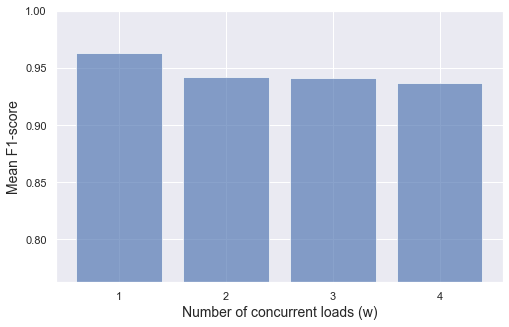

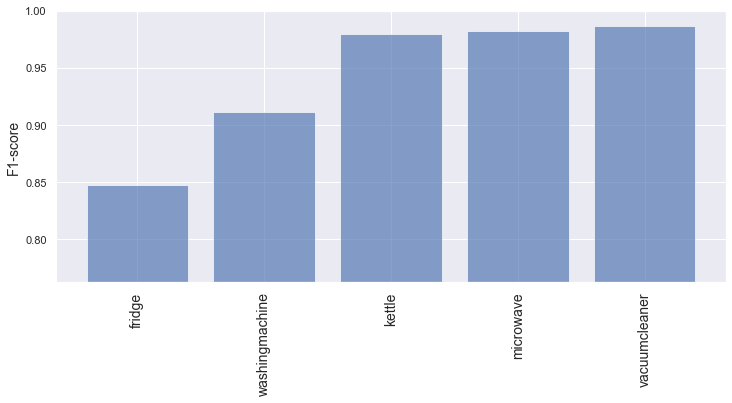

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'f1_fridge': 0.8471779078245163,
 'f1_kettle': 0.9797139912843704,
 'f1_microwave': 0.9825041890144348,
 'f1_vacuumcleaner': 0.9862018078565598,
 'f1_washingmachine': 0.9114658832550049,
 'test_mean_f1_w=1': 0.96276593,
 'test_mean_f1_w=2': 0.9414942,
 'test_mean_f1_w=3': 0.9413301,
 'test_mean_f1_w=4': 0.93626165,
 'test_t_opt': 0.5510204081632653,
 'test_weighted_mean_f1': 0.9454629719257355}
--------------------------------------------------------------------------------


In [51]:
# Load the model for evaluation
data_module = DataModule(labels, train_dataset_path, validation_dataset_path,
                         test_dataset_path, batch_size=256,
                         collate_fn=collate, n_jobs=-1, drop_last=False)
cold = ModelCOLD.load_from_checkpoint(
    "./checkpoints/cold2-epoch=32-validation_weighted_mean_f1=0.9454.ckpt")
test_log=pipeline.test(cold, datamodule=data_module)

## Experiment 3

In [57]:
experiment = 3
train_dataset_path = train_dataset_path_tpl % experiment
validation_dataset_path = validation_dataset_path_tpl % experiment
test_dataset_path = test_dataset_path_tpl % experiment
patterns = np.load("./synthetic/patterns.npy", allow_pickle=True).item()
labels = sorted(list(patterns.keys()))
# Max number of concurrent loads in the dataset
w_max = 10

In [58]:
# Hyperparameters from ASHA
config = {
    "lr": 0.0003245779272636366,
    "weight_decay": 0.028095324849578898,
    "batch_size": 64,
    "dropout": 0.2,
    "layout":  (256, 14, 8),
}
# Pytorch Lightning pipeline
pl.seed_everything(random_seed)
# Callbacks
checkpoint_callback = ModelCheckpoint(
    monitor="validation_weighted_mean_f1",
    dirpath="./checkpoints/",
    filename="cold%d-{epoch:d}-{validation_weighted_mean_f1:.4f}" % experiment,
    save_top_k=3,
    mode="max",
)
early_stop_callback = EarlyStopping(
    monitor="validation_loss",
    min_delta=0.00,
    patience=8,
    verbose=True,
    mode="min",
)
# Tensorboard dashboard
logger = TensorBoardLogger("./logs/cold%d" %
                           experiment, name="cold%d" % experiment)

Global seed set to 0


In [59]:
# Initialize the model
cold = ModelCOLD(config, n_inputs, len(labels), w_max=w_max)

In [60]:
pipeline = pl.Trainer(max_epochs=60, gpus=[0, 1], accelerator="dp",
                      num_sanity_val_steps=0, callbacks=[checkpoint_callback, early_stop_callback],
                      val_check_interval=0.9, logger=logger, gradient_clip_val=1.)

data_module = DataModule(labels, train_dataset_path, validation_dataset_path,
                         test_dataset_path, batch_size=config["batch_size"],
                         collate_fn=collate, n_jobs=-1, drop_last=False)
# Start training
pipeline.fit(cold, datamodule=data_module)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name       | Type               | Params
--------------------------------------------------
0 | affine     | Linear             | 51.7 K
1 | sequence   | Sequential         | 1.8 M 
2 | mhsa       | MultiheadAttention | 263 K 
3 | classifier | Linear             | 14.1 K
--------------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.714     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric validation_loss improved. New best score: 0.217


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.033 >= min_delta = 0.0. New best score: 0.184


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.015 >= min_delta = 0.0. New best score: 0.169


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.011 >= min_delta = 0.0. New best score: 0.158


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.008 >= min_delta = 0.0. New best score: 0.151


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.148


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.147


Validating: 0it [00:00, ?it/s]

Metric validation_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.146


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric validation_loss did not improve in the last 8 records. Best score: 0.146. Signaling Trainer to stop.


Validating: 0it [00:00, ?it/s]

Monitored metric validation_loss did not improve in the last 9 records. Best score: 0.146. Signaling Trainer to stop.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

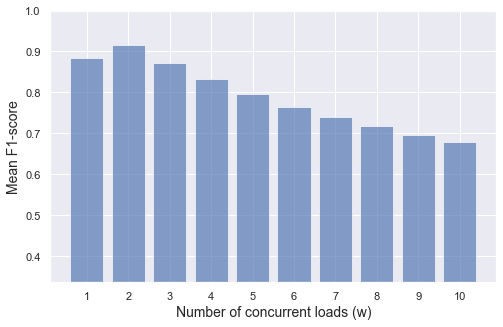

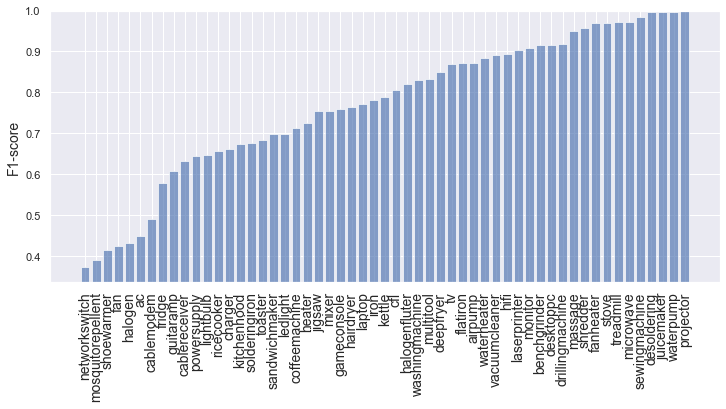

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'f1_ac': 0.44984478652477267,
 'f1_airpump': 0.8724961221218109,
 'f1_benchgrinder': 0.9159094154834747,
 'f1_cablemodem': 0.4913441389799118,
 'f1_cablereceiver': 0.6324312508106231,
 'f1_cfl': 0.8050073325634003,
 'f1_charger': 0.6610807806253434,
 'f1_coffeemachine': 0.7133658409118653,
 'f1_deepfryer': 0.8507239341735839,
 'f1_desktoppc': 0.9166436553001404,
 'f1_desoldering': 0.9958060443401336,
 'f1_drillingmachine': 0.9184288084506989,
 'f1_fan': 0.42584957331418993,
 'f1_fanheater': 0.9699542701244355,
 'f1_flatiron': 0.8714798927307129,
 'f1_fridge': 0.5788575142621994,
 'f1_gameconsole': 0.7593452513217926,
 'f1_guitaramp': 0.6082803964614868,
 'f1_hairdryer': 0.7635178387165069,
 'f1_halogen': 0.43137606233358383,
 'f1_halogenfluter': 0.8193038165569305,
 'f1_heater': 0.7256297528743744,
 'f1_hifi': 0.8936854541301728,
 'f1_iron': 0.7807612299919129,
 'f1_jigsaw': 0.75

In [61]:
# Load the model for evaluation
data_module = DataModule(labels, train_dataset_path, validation_dataset_path,
                         test_dataset_path, batch_size=256,
                         collate_fn=collate, n_jobs=-1, drop_last=False)
cold = ModelCOLD.load_from_checkpoint(
    "./checkpoints/cold3-epoch=18-validation_weighted_mean_f1=0.8025.ckpt")
test_log=pipeline.test(cold, datamodule=data_module)

## Explanation of results
The code to reproduce the values from Section "Results"

In [62]:
import pandas as pd
from tqdm.notebook import tqdm
from synthesizer import parse_magnitude 

In [63]:
import seaborn as sb
import matplotlib.pyplot as plt

In [64]:
sb.set()

### Toolbox

In [65]:
def _rms(array):
    return np.sqrt(np.sum(array**2)/len(array))

def describe(patterns, fundamental=50, sampling_rate=4000, sort_by="c_rms_mean"):
    """
    patterns :: dict -- category: list of waveforms
    fundamental :: int
    sampling_rate :: int
    sort_by :: str 
    ---
    -> pd.DataFrame 
    """

    assert isinstance(patterns, dict)
    assert isinstance(fundamental, int)
    assert isinstance(sampling_rate, int)
    assert isinstance(sort_by, str)

    data = {"label": [], "count": [], "t_mean": [], "v_f_mean": [],
            "v_rms_mean": [], "v_st_mean": [], "v_max_mean": [],
            "c_rms_mean": [], "c_max_mean": []}

    for label, channels in tqdm(patterns.items()):
        currents, voltages = channels["current"], channels["voltage"]
        # Per signal duration
        t = []
        # Voltage frequencies
        v_f = []
        # Voltage RMS values
        v_rms = []
        # Voltage steady state magnitudes
        v_st = []
        # Voltage absolute maximum values
        v_max = []
        # Current RMS values
        c_rms = []
        # Current absolute maximum values
        c_max = []
        for idx, (voltage, current) in enumerate(zip(voltages, currents)):
            v_freqs = np.fft.rfftfreq(len(voltage), 1/sampling_rate)
            t.append(len(voltage)/sampling_rate)
            v_f.append(v_freqs[np.argmax(np.abs(np.fft.rfft(voltage)))])
            v_rms.append(_rms(voltage))
            v_st.append(parse_magnitude(voltage))
            v_max.append(np.max(np.abs(voltage)))
            c_rms.append(_rms(current))
            c_max.append(np.max(np.abs(current)))

        data["label"].append(label)
        data["count"].append(len(voltages))
        data["t_mean"].append(np.mean(t))
        data["v_f_mean"].append(np.mean(v_f))
        data["v_rms_mean"].append(np.mean(v_rms))
        data["v_st_mean"].append(np.mean(v_st))
        data["v_max_mean"].append(np.mean(v_max))
        data["c_rms_mean"].append(np.mean(c_rms))
        data["c_max_mean"].append(np.mean(c_max))

    table = pd.DataFrame(data)

    return table.sort_values(by=sort_by)

### Statistics per category of appliances

In [66]:
df = describe(patterns)
df

  0%|          | 0/55 [00:00<?, ?it/s]

,label,count,t_mean,v_f_mean,v_rms_mean,v_st_mean,v_max_mean,c_rms_mean,c_max_mean
30,networkswitch,10,5.000000,50.0,221.333292,310.991638,314.555542,0.044449,4.391113
53,cablemodem,10,5.000000,50.0,221.358292,310.989410,311.572021,0.047858,3.738371
18,mosquitorepellent,10,5.000000,50.0,224.166802,311.000000,317.298981,0.054458,0.329826
9,cablereceiver,10,5.000000,50.0,221.317619,310.991425,311.481110,0.070503,2.752827
42,shoewarmer,20,5.000000,50.0,223.920235,311.000000,313.034973,0.102506,0.401527
14,halogen,10,5.000000,50.0,218.082590,311.000000,312.246765,0.110671,0.584169
19,charger,70,5.000000,50.0,222.866301,311.000000,316.860779,0.111503,3.567132
44,cfl,180,1.972222,50.0,220.809793,311.000000,313.977936,0.116555,2.611354
15,gameconsole,40,5.000000,50.0,223.858768,311.000000,320.795441,0.150023,0.633523
1,massage,30,4.666667,50.0,222.181011,311.000000,329.120636,0.155939,0.944853


In [67]:
# Select F1-values for top10 appliances with lower RMS current
f1_values = {k[3:]: v for k, v in test_log[0].items() if k.startswith(
    "f1_") and k[3:] in df.iloc[:10]["label"].values}
f1_values

{'networkswitch': 0.37344606816768644,
 'mosquitorepellent': 0.3894323207437992,
 'shoewarmer': 0.41478499323129653,
 'halogen': 0.43137606233358383,
 'cablemodem': 0.4913441389799118,
 'cablereceiver': 0.6324312508106231,
 'charger': 0.6610807806253434,
 'gameconsole': 0.7593452513217926,
 'cfl': 0.8050073325634003,
 'massage': 0.9487477302551269}

### Plot 

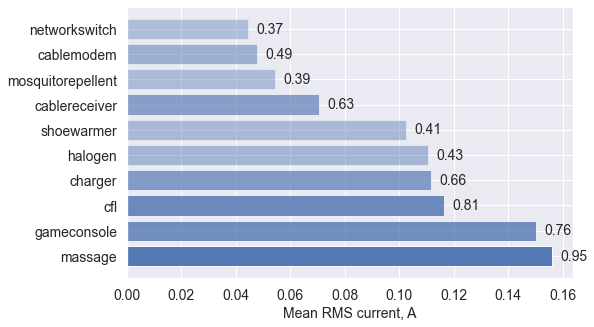

In [68]:
# Plot appliances
mask = df["label"].isin(df.iloc[:10]["label"])
plt.figure(figsize=(8, 5))
bins = plt.barh(df[mask]["label"].iloc[::-1], df[mask]
                ["c_rms_mean"].iloc[::-1])
# Bind F1-scores
for i, label in enumerate(df[mask].label.iloc[::-1].values):
    bins[i].set_alpha(f1_values[label])
    height = bins[i].get_height()
    width = bins[i].get_width()
    plt.text(width+0.008, bins[i].get_y() + bins[i].get_height()/2,
             "%.2f" % f1_values[label],
             ha="center", va="center", rotation=0, fontsize=14)
plt.xlabel("Mean RMS current, A", fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.savefig("./plots/top10.svg", bbox_inches="tight")
plt.show()

### Visual comparison of signatures

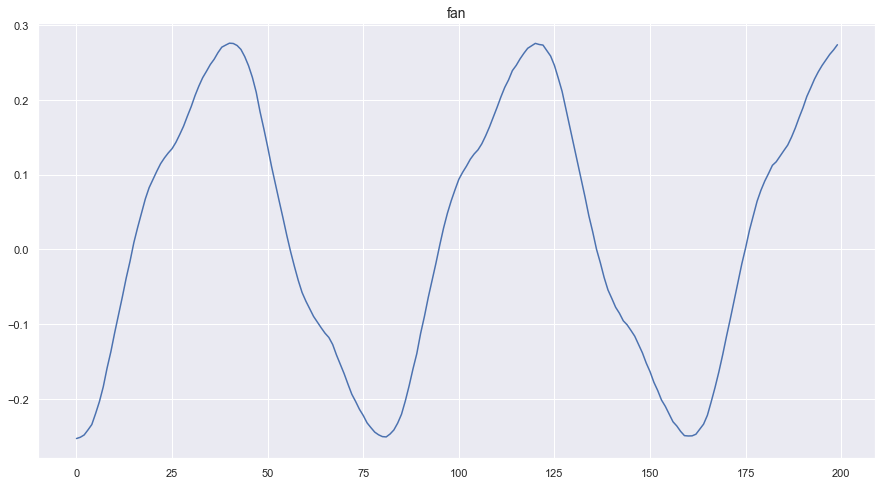

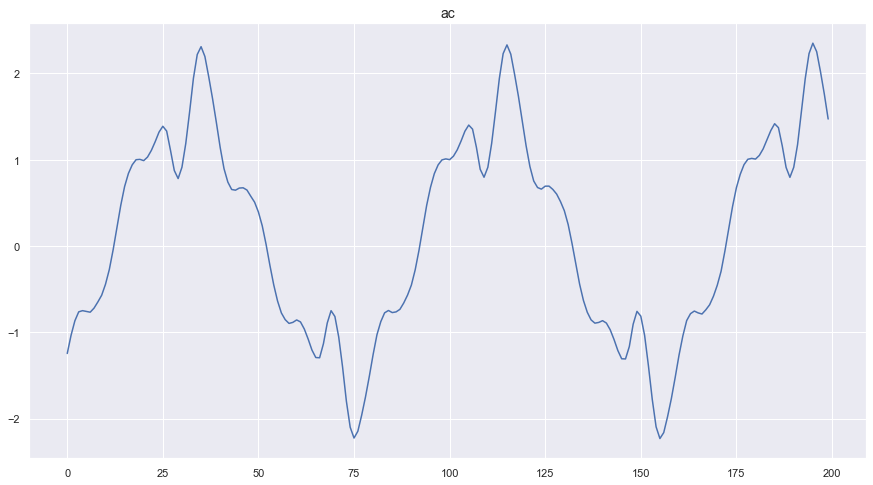

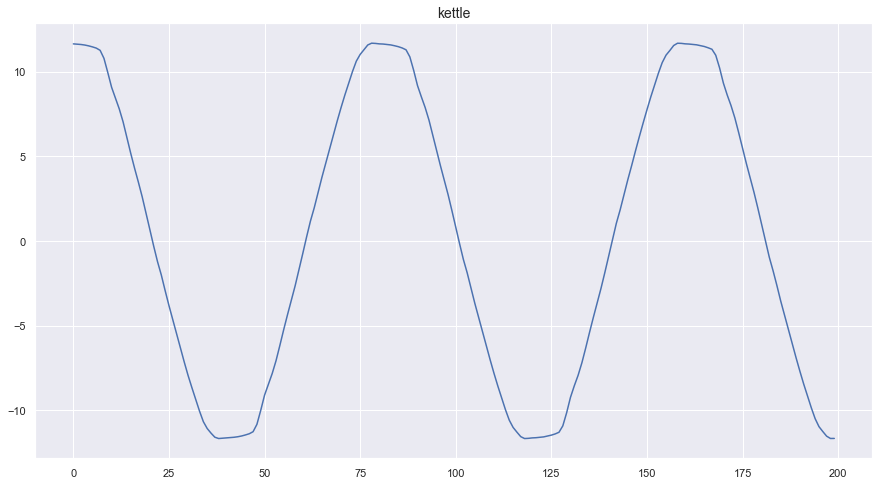

In [33]:
fan = patterns["fan"]["current"]
ac = patterns["ac"]["current"]
kettle = patterns["fanheater"]["current"]

np.random.seed(random_seed)
i = np.random.randint(min(len(fan), len(ac), len(kettle)))

plt.figure(figsize=(15, 8))
plt.plot(fan[i][2000:2200])
plt.title("fan", fontsize=14)
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(ac[i][2000:2200])
plt.title("ac", fontsize=14)
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(kettle[i][2000:2200])
plt.title("kettle", fontsize=14)
plt.show()